In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


## Make an API Call

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

# 6.2.6 Get the City Weather Data

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"City {city} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | broome
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | ravar
Processing Record 7 of Set 1 | taolanaro
City taolanaro not found. Skipping...
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | plerin
Processing Record 10 of Set 1 | labuan
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | dahod
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | ashington
Processing Record 15 of Set 1 | yerofey pavlovich
Processing Record 16 of Set 1 | isangel
Processing Record 17 of Set 1 | cap malheureux
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | murgab
Processing Record 20 of Set 1 | amderma
City amderma not found. Skipping...
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | marcona
City marcona not found. Skipp

Processing Record 34 of Set 4 | grindavik
Processing Record 35 of Set 4 | skagastrond
City skagastrond not found. Skipping...
Processing Record 36 of Set 4 | yuci
Processing Record 37 of Set 4 | gogrial
Processing Record 38 of Set 4 | bengkulu
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | katima mulilo
Processing Record 41 of Set 4 | vila velha
Processing Record 42 of Set 4 | kapaa
Processing Record 43 of Set 4 | linhares
Processing Record 44 of Set 4 | itaituba
Processing Record 45 of Set 4 | wamba
Processing Record 46 of Set 4 | chinchani
Processing Record 47 of Set 4 | ola
Processing Record 48 of Set 4 | kazachka
Processing Record 49 of Set 4 | dogondoutchi
Processing Record 50 of Set 4 | coquimbo
Processing Record 1 of Set 5 | saryshagan
City saryshagan not found. Skipping...
Processing Record 2 of Set 5 | mareeba
Processing Record 3 of Set 5 | muzaffarabad
Processing Record 4 of Set 5 | loei
Processing Record 5 of Set 5 | mozelos
Processing Record 6 of Set

Processing Record 21 of Set 8 | port-cartier
Processing Record 22 of Set 8 | ponta delgada
Processing Record 23 of Set 8 | tawkar
City tawkar not found. Skipping...
Processing Record 24 of Set 8 | san policarpo
Processing Record 25 of Set 8 | bud
Processing Record 26 of Set 8 | gamba
Processing Record 27 of Set 8 | chimbote
Processing Record 28 of Set 8 | matagami
Processing Record 29 of Set 8 | mount gambier
Processing Record 30 of Set 8 | laguna
Processing Record 31 of Set 8 | mikhaylovskoye
Processing Record 32 of Set 8 | burgeo
Processing Record 33 of Set 8 | katsuura
Processing Record 34 of Set 8 | zenzeli
Processing Record 35 of Set 8 | puri
Processing Record 36 of Set 8 | tautira
Processing Record 37 of Set 8 | san cristobal
Processing Record 38 of Set 8 | marathon
Processing Record 39 of Set 8 | mandera
Processing Record 40 of Set 8 | saint george
Processing Record 41 of Set 8 | brindisi
Processing Record 42 of Set 8 | muros
Processing Record 43 of Set 8 | shahr-e babak
Process

Processing Record 13 of Set 12 | lensk
Processing Record 14 of Set 12 | safranbolu
Processing Record 15 of Set 12 | rypefjord
Processing Record 16 of Set 12 | kavieng
Processing Record 17 of Set 12 | dzaoudzi
Processing Record 18 of Set 12 | nam som
Processing Record 19 of Set 12 | sao joao da barra
Processing Record 20 of Set 12 | stepantsevo
Processing Record 21 of Set 12 | alexandria
Processing Record 22 of Set 12 | kikwit
Processing Record 23 of Set 12 | fort-shevchenko
Processing Record 24 of Set 12 | ilulissat
Processing Record 25 of Set 12 | bargal
City bargal not found. Skipping...
Processing Record 26 of Set 12 | mafinga
Processing Record 27 of Set 12 | fallon
Processing Record 28 of Set 12 | nadvoitsy
Processing Record 29 of Set 12 | adrar
Processing Record 30 of Set 12 | hovd
Processing Record 31 of Set 12 | ploemeur
Processing Record 32 of Set 12 | mosquera
Processing Record 33 of Set 12 | san andres
Processing Record 34 of Set 12 | dariba
Processing Record 35 of Set 12 | t

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,49.23,81,100,6.02,NZ,2020-05-23 13:58:34
1,Port Alfred,-33.59,26.89,66.99,78,0,1.99,ZA,2020-05-23 14:02:46
2,Broome,42.25,-75.83,66.00,93,75,6.93,US,2020-05-23 14:02:46
3,Bredasdorp,-34.53,20.04,73.40,5,0,14.99,ZA,2020-05-23 14:02:46
4,Atuona,-9.80,-139.03,80.28,78,49,17.16,PF,2020-05-23 14:02:46
...,...,...,...,...,...,...,...,...,...
569,Malangali,-8.57,34.85,70.23,54,1,10.18,TZ,2020-05-23 14:04:24
570,Malchevskaya,49.06,40.36,56.80,53,100,12.75,RU,2020-05-23 14:04:24
571,Gull Lake,50.10,-108.48,41.00,86,1,12.75,CA,2020-05-23 14:04:24
572,Torit,4.41,32.57,86.97,54,95,1.99,SS,2020-05-23 14:04:24


In [13]:
order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2020-05-23 13:58:34,-46.60,168.33,49.23,81,100,6.02
1,Port Alfred,ZA,2020-05-23 14:02:46,-33.59,26.89,66.99,78,0,1.99
2,Broome,US,2020-05-23 14:02:46,42.25,-75.83,66.00,93,75,6.93
3,Bredasdorp,ZA,2020-05-23 14:02:46,-34.53,20.04,73.40,5,0,14.99
4,Atuona,PF,2020-05-23 14:02:46,-9.80,-139.03,80.28,78,49,17.16
...,...,...,...,...,...,...,...,...,...
569,Malangali,TZ,2020-05-23 14:04:24,-8.57,34.85,70.23,54,1,10.18
570,Malchevskaya,RU,2020-05-23 14:04:24,49.06,40.36,56.80,53,100,12.75
571,Gull Lake,CA,2020-05-23 14:04:24,50.10,-108.48,41.00,86,1,12.75
572,Torit,SS,2020-05-23 14:04:24,4.41,32.57,86.97,54,95,1.99


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature

### Get Data for Plotting

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1590242665.1107342

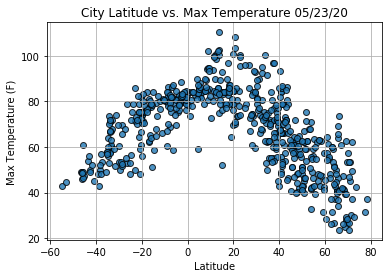

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity

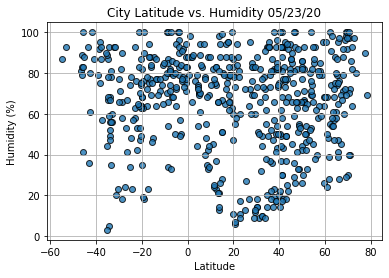

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness

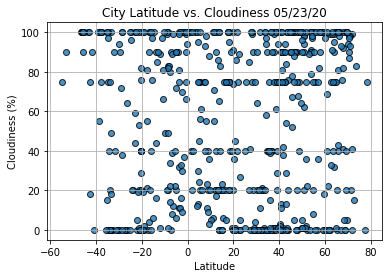

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed

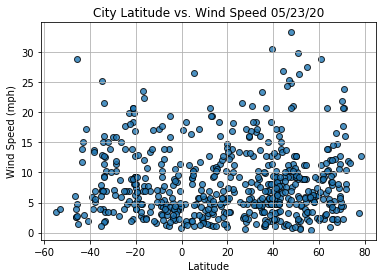

In [20]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# 6.4.1 Use Linear Regression to Find the Relationship Between Variables

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

Go to random_numbers jupyter notebook

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

Create a Linear Regression Function

In [34]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    print(f"r_value = {r_value}; p_value = {p_value}")
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    plt.title(title)   # <------------------   Missing from course material
    
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City            Yerofey Pavlovich
Country                        RU
Date          2020-05-23 14:02:48
Lat                         53.97
Lng                        121.97
Max Temp                    41.79
Humidity                       69
Cloudiness                     79
Wind Speed                   5.99
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

r_value = -0.7939500292306744; p_value = 2.650660965998795e-86


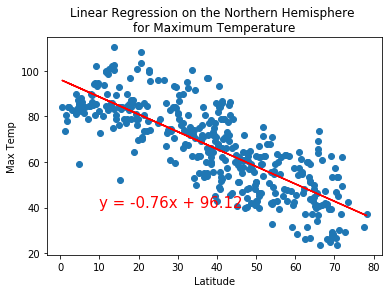

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' \
                       'for Maximum Temperature', 'Max Temp',(10,40))

Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere

r_value = 0.7855325710244837; p_value = 2.2839618238883895e-39


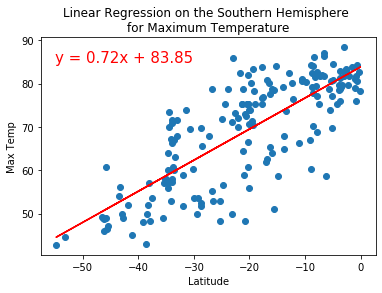

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n'\
                       'for Maximum Temperature', 'Max Temp',(-55,85))

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

r_value = 0.07756254799919336; p_value = 0.1252595224565633


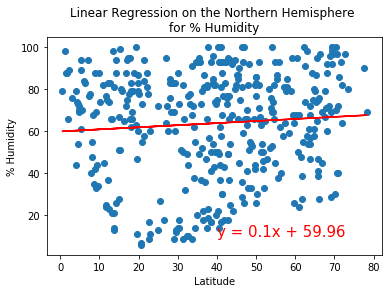

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' \
                       'for % Humidity', '% Humidity',(40,10))

Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

r_value = 0.13160598524117703; p_value = 0.07657070241580596


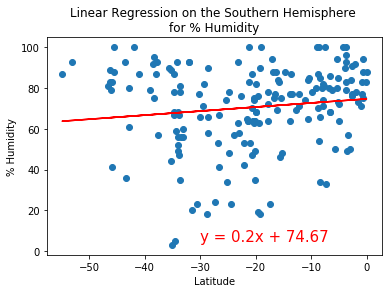

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' \
                       'for % Humidity', '% Humidity',(-30,5))

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

### SKILL DRILL
* Refactor the code we have been using for linear regression lines and plots to create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
* Call the plot_linear_regression function with the correct arguments to create the linear regression line and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot.

r_value = 0.1491663599607362; p_value = 0.0030714835466415457


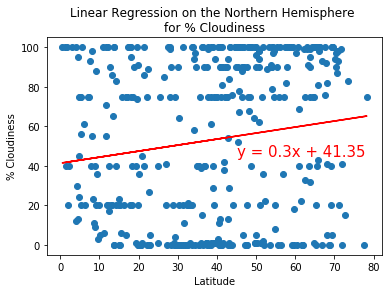

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' \
                       'for % Cloudiness', '% Cloudiness',(45,45))

Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

r_value = -0.0188877904186496; p_value = 0.8002085751007249


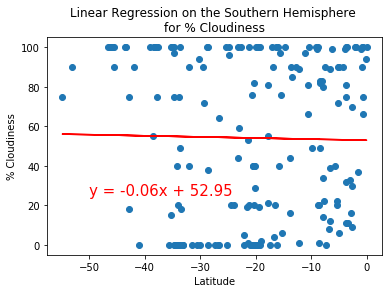

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' \
                       'for % Cloudiness', '% Cloudiness',(-50,25))

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

Perform Linear Regression on the Wind Speed for the Northern Hemisphere

r_value = 0.07563370361660106; p_value = 0.1349586515675893


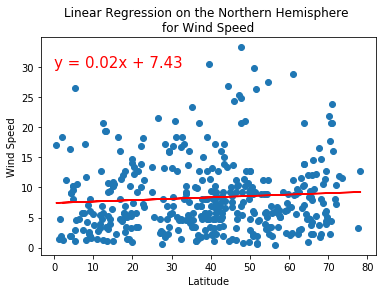

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n' \
                       'for Wind Speed', 'Wind Speed',(0,30))

Perform Linear Regression on the Wind Speed for the Southern Hemisphere

r_value = -0.1459988631230804; p_value = 0.04922791464777967


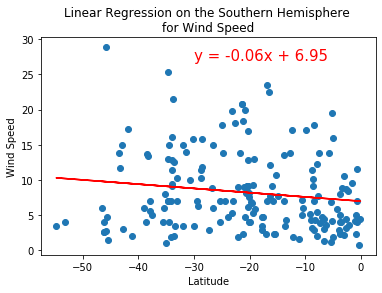

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' \
                       'for Wind Speed', 'Wind Speed',(-30,27))